<a href="https://colab.research.google.com/github/StetskoSergey/pida5_stetsko/blob/master/Dz2_var2_of_004_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Реализация логистической регрессии в TensorFlow

In [0]:
import numpy as np
import tensorflow as tf

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt

## Генерируем данные для задачи регрессии

In [0]:
NUM_FEATURES = 2
NUM_SAMPLES = 1000

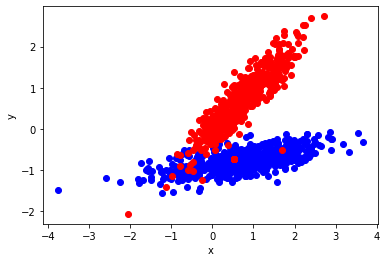

In [0]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = NUM_SAMPLES,
                           n_features = NUM_FEATURES,
                           n_informative = NUM_FEATURES,
                           n_redundant = 0,
                           n_classes = 2,
                           n_clusters_per_class = 1,
                           class_sep = 0.75,
                           random_state = 54312)

y = y.reshape(-1, 1)

ones = np.where(y == 1)   # индексы объектов класса '1'
zeros = np.where(y == 0)  # индексы объектов класса '0'

plt.xlabel('x')
plt.ylabel('y')
plt.plot(X[ones, 0], X[ones, 1], 'ob',
         X[zeros, 0], X[zeros, 1], 'or');

## Создание графа вычислений и обучение модели

In [0]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(NUM_FEATURES, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [0]:
history = model.fit(X, y, epochs=10)

Epoch 1/10
32/32 [==============================] - 0s 979us/step - loss: 0.5340 - accuracy: 0.9780
Epoch 2/10
32/32 [==============================] - 0s 962us/step - loss: 0.5327 - accuracy: 0.9780
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 0.5331 - accuracy: 0.9780
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 0.5318 - accuracy: 0.9780
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 0.5319 - accuracy: 0.9780
Epoch 6/10
32/32 [==============================] - 0s 1ms/step - loss: 0.5288 - accuracy: 0.9780
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 0.5313 - accuracy: 0.9780
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 0.5309 - accuracy: 0.9780
Epoch 9/10
32/32 [==============================] - 0s 1ms/step - loss: 0.5296 - accuracy: 0.9780
Epoch 10/10
32/32 [==============================] - 0s 951us/step - loss: 0.5291 - accuracy: 0.9780


## Визуализируем кривую обучения

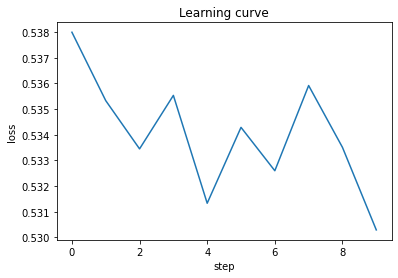

In [0]:
plt.xlabel('step')
plt.ylabel('loss')
plt.title('Learning curve')
plt.plot(history.history['loss']);

## Визуализируем разделяющую гиперплоскость

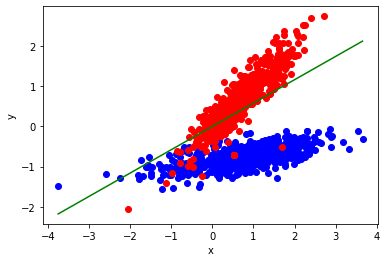

In [0]:
weights = model.get_weights()
y_pred =  X[:, 0] * weights[1][0] / weights[1][1]

order = np.argsort(X[:, 0])

plt.xlabel('x')
plt.ylabel('y')
plt.plot(X[ones, 0], X[ones, 1], 'ob',
         X[zeros, 0], X[zeros, 1], 'or',
         X[order, 0], y_pred[order], '-g');